# WEEK 8: Notes

In this week, we'll start with the Decision Tree implementations in SK-Learn followed by ensemble methods(bagging and boosting)

# Decision Tree
- Non-parametric supervised learning
- Can learn classification as well as regression models
- Predicts labels based on rules inferred from the features in the training set

## Tree Algorithms:
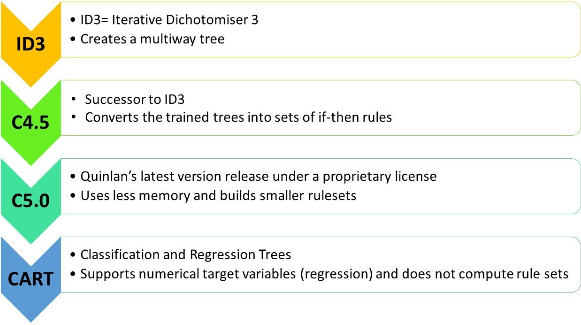

# SK-Learn Implementation of Trees

- SK-Learn uses an optimized versoin of the <span style="color:purple">CART</span> algorithm

- It <span style="color:red">does not support</span> categorical variables(at least, for now)

In [2]:
from sklearn.tree import (DecisionTreeClassifier, 
                          DecisionTreeRegressor)

- Both above estimators have the same set of parameters except for "```criterion```" parameter
    ***
    - ```splitter```: **Strategy** for splitting at each note
        - ```'best'```, ```'random'```
        - default "best"
    ***
    
    - ```max_depth```: **Maximum depth** of the tree
        - int values
        - When ```None```, the tree expands until all leaves are pure or they contain less than ```min_sample_split```
        - Default ```"None"```
    ***
    
    - ```min_samples_split```: **Minimum number of samples** required to split an internal node
        - int, float values
        - Default = 2
    ***
    
    - ```min_samples_leaf```: **Minimum number of samples** required to be at a leaf node
        - int, float values
        - default = 1
    ***
    
    - ```criterion```: **Specifies function** to measure the quality of a split
        - ***CLASSIFICATION***: gini, entropy
            - Default: 'gini'
        - ***Regression***: squared_error, friedman_mse, absolute_error, poisson
            - Default: 'squared_error'
            
    ***

## Tree Visialization

- Can visualize the tree trained using the following API below
- Some parameters are there, which can be adjusted to customize the tree viz.


In [4]:
from sklearn.tree import plot_tree

## Avoiding Overfitting of trees

- Overfitting is the most common problem that can be faced while training a tree
- So, we can use the following streategies to avoid it

1. ```Pre-Pruning```
    - Uses HP search like ```GridSearchCV``` for finding the best set of parameters
1. ```Post-Pruning```
    - First, it grows the tree without constraints and then it uses ```cost_complexity_pruning``` with ```max_depth``` and ```min_samples_split```

- Pruning is a technique that removes the parts of the Decision Tree which prevent it from growing to its full depth. The parts that it removes from the tree are the parts that do not provide the power to classify instances. A Decision tree that is trained to its full depth will highly likely lead to overfitting the training data - therefore Pruning is important. 


## Some Practical Usage Tips
- Make sure that we have the right ratio of samples to the number of features. DTrees tend to overfit data when d>>

- Perform PCA or feature selection (<span style="color:purple">dimensionality reduction</span>) on the data before using it for training the trees
    - It gives a better chance of finding discriminative features
- Visualize the trained tree by using <span style="color:purple">max_depth=3</span> as an initial tree depth to get a feel for the fitment and then increase the depth
- Balance the dataset before training to prevent the tree from being biased toward the classes that are dominant
- use ```min_samples_split``` or ```min_samples_leaf``` to ensure that multiple samples influence every decision in the tree, by controlling which splits will be considered.
    - A very small number will usually mean the tree will overfit
    - A large number will prevent the tree from learning the data

# Ensemble Methods
- Let's begin with the next set of ML algorithms and models: "Ensemble Methods"

## Voting Estimators

- Trains multiple models and then voting happens. Most voted result is the output

In [5]:
from sklearn.ensemble import (VotingClassifier, VotingRegressor)


## Bagging Estimators

- Bagging is Bootstrap Aggregation
    - Bootstrap the data(random sampling with replacement)
    - Train multiple models on these subsets
    - Aggregate the result from each individual model
   

In [6]:
from sklearn.ensemble import (BaggingClassifier, BaggingRegressor)

In [7]:
# DEFAULT PARAMETERS

BaggingClassifier(estimator=None, # WHich estimator to use, 
                          # if None, uses DTree
                  n_estimators=10, # Number of base-estimators
                  max_features=1, # Number of samples to draw (without replacement)
                  max_samples=1, # Number of samples to draw (with replacement)
                  bootstrap=True, # With or without replacement
                  bootstrap_features=False, # draw features with or without replacement
                  oob_score=False # Whether to use out-of-bag samples 
                          # to estimate generalization error
                 )

BaggingClassifier(max_features=1, max_samples=1)

## Random Forest Estimator

- RF is a bagged version of DTrees
- Many DTrees are combined to form a random forest

- The parameters can be classified as: 
    1. Bagging parameters
    1. Decision Tree parameters
***
### Bagging Parameters
- ```n_estimators``` specifies the number of trees to use
    - Default for classification = 100
    - Default for regression = 100
    
- ```bootstrap``` specifies whether to use bootstrap samples for trianing
    - True: bootstrapped samples are used
    - False: whole dataset is used
- ```oob_score``` specified whether to use out-of-bag samples for estimating generalization error. It is only available when ```bootstrap=True```

- ```max_samples``` specifies the number of samples to be drawn while bootstrapping
    - **None**: Use all samples
        - Default
    - **int**: use max_samples sample from the training data
    - **float**: use max_samples\*(total number of samples from training data)
        - Value between 0 and 1
        - Specifies the ratio of the training set to use
        
- ```max_features``` specifies the number of features to consider while splitting

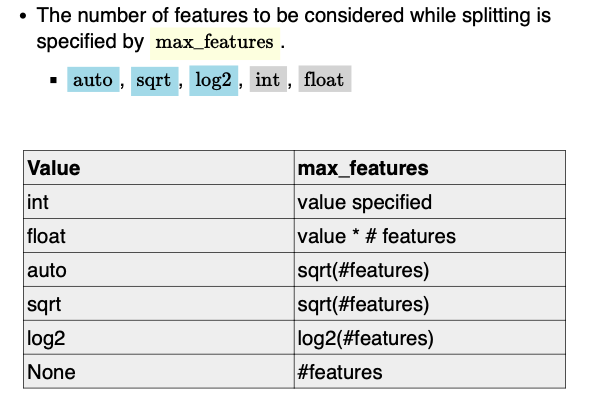

In [10]:
from sklearn.ensemble import (RandomForestClassifier, 
                              RandomForestRegressor)

### Decision Tree Parameters

- ```criterion``` specifies the criteria for splitting the nodes
    - Default for classification: gini
    - Default for regression: squared_error
- ```max_depth``` controls the depth of the tree.
    - Default = None; i.e., tree grows till 
        - all leaf nodes are pure
        - OR 
        - until leaves contain less than ```min_samples_splits``` samples
        
- ```min_impurity_decrease```: a node will be split if it reduces impurity by at least this value


***

#### Inference for RF

- ```.decision_path``` returns decision path in the forest
- ```.predict``` returns class labels or a value 
- ```.predict_proba``` and ```.predict_log_proba``` returns probabilities and their logs for classifcation setup

## Boosting

- Two boosting estimators:
    1. AdaBoost Estimator
    1. Gradient Boosting Estimator

In [12]:
from sklearn.ensemble import (AdaBoostClassifier,
                              AdaBoostRegressor)

## Adaptive Boosting
### ```AdaBoostClassifier```

- ```base_estimator```: Specifies the base estimator for boosting
    - Default estimator is Dtree with depth = 1
- ```n_estimators```:  Maximum number of estimators where boosting is terminated.
    - Default = 50
- ```learning_rate```: weight applied to each classifier during boosting.
    - Higher value here would increase contribution of individual classifiers
    - There is a trade-off between ```n_estimators``` and ```learning_rate```
    
    
### ```AdaBoostRegressor```
- ```base_estimator```
- ```n_estimator```
- ```learning_rate```

***

> Main parameters to tune to obtain good results are:
> - n_estimators
> - complexity of the base estimators(max_depth, min_samples_split, etc)

### Attributes of AdaBoost
- ```base_estimator_```: Base etimator used
- ```estimators_```: Collection of fitted sub-estimators
- ```estimators_weights_```: weights for each fitted estimator
- ```estimators_errors_```: errors for each estimators


## Gradient Boosting Estimators

- Supports both, binary and multi-class classification
- 2 important parameters:
    1. ```n_estimators```
    1. ```learning_rate```

In [1]:
from sklearn.ensemble import (GradientBoostingClassifier, 
                              GradientBoostingRegressor)


## XGBoost

- It is another module that can be used for boosting

- Stands for <span style="color:green">eXtreme Gradient Boosting</span>

In [17]:
!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 1.2 MB/s eta 0:00:0000:0100:01


In [18]:
import xgboost

In [ ]:
xgboost.XGBClassifier()